In [25]:
import math
#calculate coverage:
PMTDiam=3
WLS = 2.5*PMTDiam*0.0254*100 #WLS diemnsion (full length)
print("WLS in (cm) ", WLS)
R1 = PMTDiam*0.0254/2  #PMT Diameter in inches->Radius in m
A1=math.pi*R1**2 #PMT area
Acap= math.pi*36**2 #endcaps area
photocoverage=0.42/100
NumPMTs=photocoverage*Acap/A1 # Number of PMTs at each endcap
print("NumPMTs in cap: ",NumPMTs)
Acyl= 2*math.pi*36*56 #endcaps area
NumPMTsCyl=photocoverage*Acyl/A1 # Number of PMTs at barrel
print("NumPMTs in barrel: ",NumPMTsCyl)
print("Total Nmuber of PMTs: ",NumPMTsCyl+2*NumPMTs)

WLS in (cm)  19.05
NumPMTs in cap:  3749.7674995349994
NumPMTs in barrel:  11665.943331886667
Total Nmuber of PMTs:  19165.478330956666


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
filein = open("geofile.txt","r")
#lines=f.readlines()
#for line in lines:
#    if line in range(38451,77474):
Dataset = pd.read_csv(filein,skiprows=38450,sep=',',header=None)
Dataset.columns=['id','x', 'y', 'z','dirx', 'diry', 'dirz', 'last']
#Dataset = np.array(pd.read_csv(filein,skiprows=38451,sep=' '))
#features, labels = np.split(Dataset,[-1],axis=1)
#x, y, z = np.split(Dataset,[2,3],axis=1)
a0, x0, y0, z0, rest = np.split(Dataset,[1,2,3,4],axis=1)
a = a0.astype('float64').get_values()
x = x0.astype('float64').get_values()
y = y0.astype('float64').get_values()
z = z0.astype('float64').get_values()

#print('Dataset.info()', Dataset.info())
print("Dataset: ",Dataset.head())

filein2 = open("output.txt","r")
Dataset2 = pd.read_csv(filein2,sep=',', header=None)
Dataset2.columns=['id','Q']
print(Dataset2.head())
#print("Dataset2['id'][0]: ",Dataset2['id'][0])

Dataset:     id            x           y            z      dirx      diry  dirz  last
0   1  3601.178081   48.241281 -2444.109281  0.999189  0.040266  -0.0     3
1   2  3601.178081   48.241281 -2333.586719  0.999189  0.040266  -0.0     3
2   3  3597.280231  144.965438 -2444.109281  0.999189  0.040266  -0.0     3
3   4  3597.280231  144.965438 -2333.586719  0.999189  0.040266  -0.0     3
4   5  3593.382381  241.689595 -2444.109281  0.999189  0.040266  -0.0     3
      id        Q
0   5383  1.30842
1   5293  4.73654
2  10983  1.25683
3   5725  1.47130
4  17963  1.35513


In [27]:
x_coord=np.array(0)
y_coord=np.array(0)
z_coord=np.array(0)
Rhit=np.array(0)
q=np.array(0)
#if abs(Dataset.get_value(id0-1,'z')) != 2798.2:
for i in range(0,len(Dataset2)):
      id2 = Dataset2['id'][i]
      q = np.append(q, (Dataset2.loc[[i],['Q']]))
      x_coord = np.append(x_coord, (Dataset.loc[[id2-1],['x']]) )
      y_coord = np.append(y_coord, (Dataset.loc[[id2-1],['y']]) )
      z_coord = np.append(z_coord, (Dataset.loc[[id2-1],['z']]) )
      #print("id2: ",id2,",",q, "  | ",Dataset.loc[[id2-1],:] ) # Dataset[:][id2-1])      
q=np.delete(q, 0)
x_coord=np.delete(x_coord, 0)
y_coord=np.delete(y_coord, 0)
z_coord=np.delete(z_coord, 0)
for u in range(0,len(Dataset2)):
    Rhit=np.append(Rhit, math.sqrt(x_coord[u]**2 + y_coord[u]**2) )
    if u==0:
        Rhit=np.delete(Rhit, 0) 
    print(x_coord[u], x_coord[u]**2 +y_coord[u]**2," ",Rhit[u])

print(len(x_coord), x_coord[0], " ",y_coord[0], "|| ", Rhit[0],",", q[0])
#Dataset[['a'].apply(lambda x: Dataset2['id'][x] in range(0,len(Dataset2)))
#print("----",df)
#FullDataset = Dataset[Dataset2[lambda x: x in range Dataset2.all()]]
#print("type(FullDataset): ",type(FullDataset)," ",FullDataset.head())

-3601.17808149 12970810.7958   3601.50118642
-1322.10172778 12970810.7958   3601.50118642
-3013.14329879 9154065.8658   3025.56868469
386.184503555 12970810.7958   3601.50118642
-3431.31721742 12972250.9158   3601.70111416
481.995680604 12972250.9158   3601.70111416
2962.90651399 12961440.04   3600.2
-3331.91877916 12970810.7958   3601.50118642
2006.00051915 12970810.7958   3601.50118642
3573.95048853 12961440.04   3600.2
931.335201444 5912626.14938   2431.58922299
-1758.81086619 12970810.7958   3601.50118642
-3211.10367267 12970810.7958   3601.50118642
2459.83202871 12970810.7958   3601.50118642
-3400.57217468 12970810.7958   3601.50118642
-3593.38238094 12970810.7958   3601.50118642
-3484.98949719 12970810.7958   3601.50118642
1411.15818882 12961440.04   3600.2
-1479.17943759 5456423.52263   2335.89886824
-931.335201444 1374610.54641   1172.43786462
577.512693344 12961440.04   3600.2
2529.41548804 12970810.7958   3601.50118642
3508.27524357 12972250.9158   3601.70111416
3013.14329879

2355.73021542 5912626.14939   2431.589223
-577.512693344 12961440.04   3600.2
767.642363115 12972250.9158   3601.70111416
2794.00560433 8889948.55557   2981.60167621
-2085.40411044 12970810.7958   3601.50118642
-821.766354215 750333.267689   866.217794604
3166.26599074 12970810.7958   3601.50118642
-1917.4548265 12107377.6074   3479.56572109
-2136.59252096 11771228.3035   3430.9223692
3585.61876029 12970810.7958   3601.50118642
-673.093870597 12972250.9158   3601.70111416
-2085.40411044 12970810.7958   3601.50118642
2027.02367373 4471986.27542   2114.70713703
-955.574009154 12970810.7958   3601.50118642
3013.14329879 10162513.7776   3187.8697868
2027.02367373 7377276.68791   2716.11426268
289.695740694 12961440.04   3600.2
-2355.73021542 12179409.6011   3489.90108758
955.574009154 12970810.7958   3601.50118642
673.061788341 12970810.7958   3601.50118642
383.4909653 390173.299198   624.638534833
-3527.44230548 12961440.04   3600.2
1500.21464986 12970810.7958   3601.50118642
-2459.832028

-1673.09636399 12961440.04   3600.2
-2162.91244816 12962880.16   3600.4
383.4909653 10594705.7398   3254.95095812
821.766354215 2551133.11014   1597.22669341
-1698.31713204 5072252.88957   2252.16626597
-1260.04174313 2455090.45188   1566.87282569
-1411.23658214 12962880.16   3600.4
-1048.24725673 12970810.7958   3601.50118642
3400.57217468 12970810.7958   3601.50118642
3069.46332667 12970810.7958   3601.50118642
-1842.3672153 12970810.7958   3601.50118642
931.335201444 2455090.45188   1566.87282569
-2663.53061381 12970810.7958   3601.50118642
-96.802664072 12970810.7958   3601.50118642
821.766354215 11122940.3602   3335.10724868
-3601.17808149 12970810.7958   3601.50118642
2788.73278357 12961440.04   3600.2
2596.47305093 12961440.04   3600.2
3122.71214602 9994439.12561   3161.39828646
1040.90404867 3607602.35104   1899.36893495
577.512693344 12961440.04   3600.2
-602.628659758 10810801.7209   3287.97836381
2246.16136819 9610268.49255   3100.04330495
-2387.3741942 12961440.04   3600.2


-3573.95048853 12961440.04   3600.2
2663.53061381 12970810.7958   3601.50118642
-3597.28023122 12961440.04   3600.2
-3546.80532552 12970810.7958   3601.50118642
955.574009154 12970810.7958   3601.50118642
-1140.06811128 12961440.04   3600.2
-1260.04174313 10018449.7902   3165.19348384
-3232.28099324 10954865.7082   3309.81354584
2459.83202871 12970810.7958   3601.50118642
-2596.47305093 12961440.04   3600.2
673.061788341 12970810.7958   3601.50118642
386.200596869 12972250.9158   3601.70111416
-2240.18048898 12970810.7958   3601.50118642
2684.4367571 8793905.89731   2965.45205615
3484.98949719 12970810.7958   3601.50118642
1411.23658214 12962880.16   3600.4
2355.73021542 9658289.82169   3107.77892098
-2727.51038633 12970810.7958   3601.50118642
-2136.59252096 4568028.93369   2137.29476996
-3593.38238094 12970810.7958   3601.50118642
2788.73278357 12961440.04   3600.2
577.512693344 12961440.04   3600.2
-2596.47305093 12961440.04   3600.2
3508.07928544 12970810.7958   3601.50118642
2027.

1369.61059036 6921074.06116   2630.79342807
-2136.59252096 5432412.85807   2330.7537103
-96.802664072 12970810.7958   3601.50118642
-2246.16136819 5192306.2124   2278.66325121
3331.91877916 12970810.7958   3601.50118642
-3601.17808149 12970810.7958   3601.50118642
3331.91877916 12970810.7958   3601.50118642
2727.51038633 12970810.7958   3601.50118642
712.197506986 1374610.54641   1172.43786462
-1040.90404867 12251441.5948   3500.20593606
-2136.59252096 11771228.3035   3430.9223692
2246.16136819 7569362.00444   2751.24735428
-861.584254568 12961440.04   3600.2
-3546.80532552 12970810.7958   3601.50118642
2136.59252096 10114492.4484   3180.32898431
2907.91633314 12970810.7958   3601.50118642
3013.14329879 10666737.7335   3265.99720353
2240.18048898 12970810.7958   3601.50118642
-577.512693344 12961440.04   3600.2
-1917.4548265 3919740.9904   1979.83357644
481.963598347 12970810.7958   3601.50118642
3451.4186877 12275452.2594   3503.63415033
1369.61059036 2551133.11014   1597.22669341
-34

-3431.1251138 12970810.7958   3601.50118642
-2962.90651399 12961440.04   3600.2
1807.88597927 5144284.88327   2268.10160338
-767.594499982 12970810.7958   3601.50118642
54.784423614 246109.311802   496.094055399
-54.784423614 30013.3307075   173.243558921
-3597.28023122 12961440.04   3600.2
-3601.17808149 12970810.7958   3601.50118642
-1479.17943759 8265671.27686   2875.00804814
767.594499982 12970810.7958   3601.50118642
-3458.0573055 12961440.04   3600.2
-1040.90404867 7161180.70682   2676.03824839
-955.574009154 12970810.7958   3601.50118642
1140.06811128 12961440.04   3600.2
54.784423614 30013.3307075   173.243558921
-3252.60225468 12961440.04   3600.2
602.628659758 8169628.61859   2858.2562199
2246.16136819 9154065.8658   3025.56868469
-3593.38238094 12970810.7958   3601.50118642
3574.1490303 12962880.16   3600.4
-2574.86790987 6993106.05486   2644.44815696
-3117.8646587 12961440.04   3600.2
-3122.71214602 10426631.0878   3229.02943433
861.584254568 12961440.04   3600.2
2663.53061

In [28]:
print("---lens: ", len(a)," ",len(x),",",len(y),",",len(z))
#print("x[0]: ",x(0))
print("Check dimensions: x: ",x.min(), " max: ", x.max())
print("                  y: ",y.min(), " max: ", y.max())
print("                  z: ",z.min(), " max: ", z.max())
xmin=x.min()
ymin=y.min()
xmax=x.max()
ymax=y.max()
print('xmin ', type(xmin), "&",xmin)
print("R_min: ", math.sqrt(xmin**2 + ymin**2)," R_max: ", math.sqrt(xmax**2 + ymax**2))
cap=z[z>2798]
print("PMTS @ upper cap: ",len(cap)," @ lower cap: ",len(z[z<-2798])," out of: ",len(a)," PMTs in total.")
print("PMTs @ cylinder: ", len(a)-len(z[z<-2798])-len(cap))

---lens:  18220   18220 , 18220 , 18220
Check dimensions: x:  -3601.37791929  max:  3601.37791929
                  y:  -3600.4  max:  3600.4
                  z:  -2798.2  max:  2798.2
xmin  <class 'numpy.float64'> & -3601.37791929
R_min:  5092.426050278666  R_max:  5092.426050278666
PMTS @ upper cap:  3260  @ lower cap:  3260  out of:  18220  PMTs in total.
PMTs @ cylinder:  11700


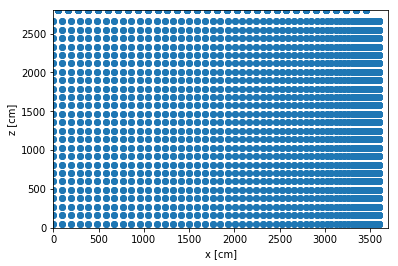

In [29]:
fig, ax = plt.subplots()
ax.scatter(x,z)
ax.set_xlabel("x [cm]")
ax.set_ylabel("z [cm]")
ax.set_xlim(0, 3700)
ax.set_ylim(0, 2800)
#plt.plot((-2000, 2000), (-2000, 2000), 'r-') #plot line
ax = plt.gca()
#r = plt.Rectangle((-2500., -2500.), 5000., 5000., fill=False)
#ax.add_artist(r)
#ax.set_ylim(2700., 2900)
plt.show()

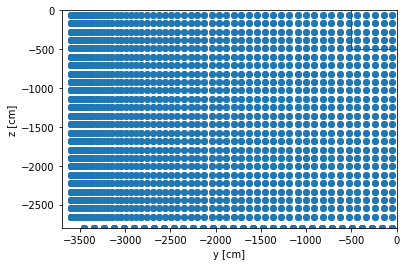

In [30]:
fig1, ax1 = plt.subplots()
ax1.scatter(y,z)
ax1.set_xlabel("y [cm]")
ax1.set_ylabel("z [cm]")
ax1.set_xlim(-3700,0)
ax1.set_ylim(-2800,0)
ax = plt.gca()
r = plt.Rectangle((-500., -500.), 1000., 1000., fill=False, color='r')
ax.add_artist(r)
#ax.set_ylim(2700., 2900)
plt.show()

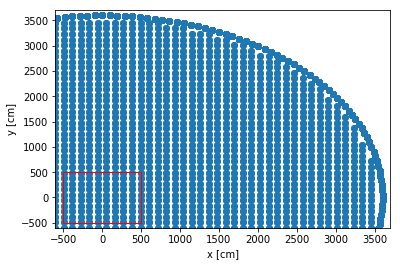

In [31]:
fig2, ax2 = plt.subplots()
ax2.scatter(x,y)
ax2.set_xlabel("x [cm]")
ax2.set_ylabel("y [cm]")
ax2.set_xlim(-600, 3700)
ax2.set_ylim(-600, 3700)
#ax2.set_aspect(1.)
ax = plt.gca()
r = plt.Rectangle((-500., -500.), 1000., 1000., fill=False,color='r')
ax.add_artist(r)

plt.show()

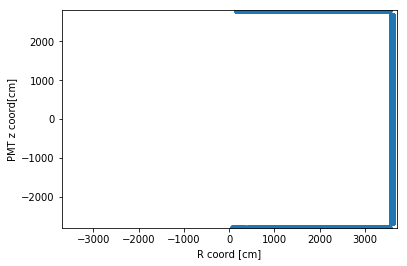

In [32]:
fig3, ax3 = plt.subplots()
ax3.scatter(Rhit, z_coord)
ax3.set_xlabel("R coord [cm]")
ax3.set_ylabel("PMT z coord[cm]")
ax3.set_xlim(-3700,3700)
ax3.set_ylim(-2800,2800)
ax = plt.gca()
r = plt.Rectangle((-500., -500.), 1000., 1000., fill=False)
#ax.add_artist(r)

plt.show()

In [33]:
#print(z_coord[z_coord<2798])
print(len(q) , ", ", len(Rhit))

3382 ,  3382


In [34]:
hits_df0 = pd.DataFrame({'x':x_coord, 'y':y_coord, 'z':z_coord, 'R':Rhit, 'Q':q})
print(hits_df0.shape)
hits_df = hits_df0[abs(hits_df0['z'])<2798.2]
print(hits_df.head())
#print(hits_df)
print(hits_df.shape)
#(Dataset.get_value(id0-1,'z')) != 2798.2

(3382, 5)
         Q            R            x            y            z
0  1.30842  3601.501186 -3601.178081   -48.241281   -55.261281
1  4.73654  3601.501186 -1322.101728  3350.053405   -55.261281
3  1.47130  3601.501186   386.184504  3580.736283   161.906719
4  1.35513  3601.701114 -3431.317217  1094.674869 -2661.277281
5  1.01255  3601.701114   481.995681 -3569.304005 -2661.277281
(2161, 5)


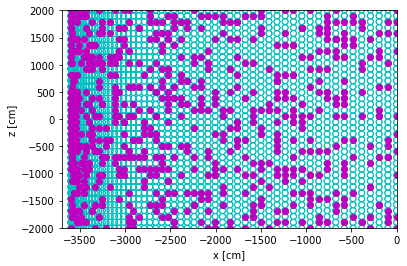

In [35]:
fig, ax = plt.subplots()
ax.scatter(x,z, facecolors='none', edgecolors='c')
ax.scatter(x_coord,z_coord, facecolors='m', edgecolors='m')
ax.set_xlim(-3700,0)
ax.set_ylim(-2000,2000)
ax.set_xlabel("x [cm]")
ax.set_ylabel("z [cm]")
plt.show()

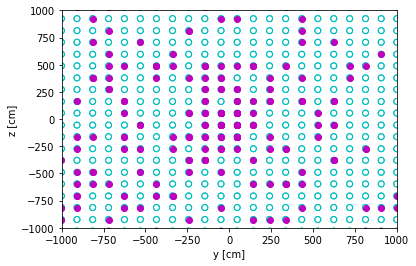

In [36]:
fig, ax = plt.subplots()
ax.scatter(y,z, facecolors='none', edgecolors='c')
ax.scatter(y_coord,z_coord, facecolors='m', edgecolors='m')
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
ax.set_xlabel("y [cm]")
ax.set_ylabel("z [cm]")
plt.show()

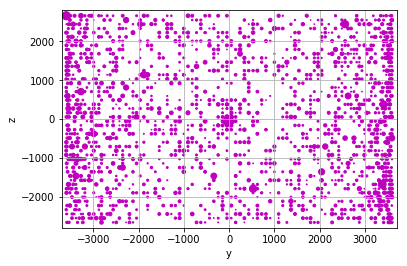

In [37]:
#hits_df.plot.scatter(x='x', y='y', s=hits_df['Q']*10, c='c');
#hits_df.plot.hexbin(x='x', y='y', gridsize=10, reduce_C_function=np.max, mincnt=1)
fig, ax0 = plt.subplots()
#ax.scatter(x,z, facecolors='none', edgecolors='c')
hits_df.plot(x='y',y='z',ax=ax0, kind='scatter', s=hits_df['Q']*5, c='m',grid=True)
ax0.set_xlim(-3700,3700)
ax0.set_ylim(-2800,2800)
plt.show()

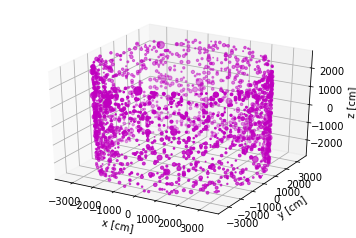

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x_coord, y_coord, z_coord, cmap=cm.coolwarm, linewidth=0, antialiased=False);
xval=hits_df.loc[:,'x'].values
yval=hits_df.loc[:,'y'].values
zval=hits_df.loc[:,'z'].values
qval=hits_df.loc[:,'Q'].values
Rval=hits_df.loc[:,'R'].values
ax3.scatter(xs=xval, ys=yval,zs=zval, zdir='z', s=qval*5, c='m');
ax3.set_xlabel("x [cm]")
ax3.set_ylabel("y [cm]")
ax3.set_zlabel("z [cm]")
ax3.set_xlim(-3700,3700)
ax3.set_ylim(-3700,3700)
ax3.set_zlim(-2800,2800)
plt.savefig('3d_3inch_NoDN_0_42_37negx.png')
plt.show()